In [9]:
import numpy as np
from typing import Tuple, List
import random
import matplotlib.pyplot as plt
# random.seed(42)

In [10]:
class Node:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    
  def dist(self, other : "Node"):
    return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    
  def __str__(self):
    return f'({self.x}, {self.y})'
  
  def distSquare(self, other : "Node"):
    return (self.x - other.x)**2 + (self.y - other.y)**2
  


In [11]:
class Path:
  def __init__(self):
    self.path : List[Node] = []
    self.size = 0
      
  def append(self, node : Node):
    self.path.append(node)
    self.size += 1
    
  def __str__(self):
    return f'{self.path}'
  
  def plot(self, title = ""):
    x_coords = [node.x for node in self.path]
    y_coords = [node.y for node in self.path]

    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')

    for i in range(len(self.path) - 1):
        if i != len(self.path) - 1:
            plt.plot([self.path[i].x, self.path[i+1].x], [self.path[i].y, self.path[i+1].y], color='r')

    if len(self.path) > 1 and self.path[0] != self.path[-1]:
        plt.plot([self.path[-1].x, self.path[0].x], [self.path[-1].y, self.path[0].y], color='r')

    
    plt.title(title)
    plt.grid(True)
    plt.show()
  
  def pathLength(self):
    length = 0
    for i in range(self.size):
      length += self.path[i % self.size].dist(self.path[(i+1) % self.size])
    return length
  
  def swap(self, i, j):
    self.path = self.path[:i+1] + self.path[i+1:j+1][::-1] + self.path[j+1:]
  
  def lengthDelta(self, i, j):
    return -self.path[i].distSquare(self.path[(i+1) % self.size]) - self.path[j].distSquare(self.path[(j+1) % self.size]) + self.path[i].distSquare(self.path[j]) + self.path[(i+1) % self.size].distSquare(self.path[(j+1) % self.size])
    
  def twoOpt(self, maxIter=1e2):
    foundImprovement = True
    iters = 0
    while foundImprovement and iters < maxIter:
      foundImprovement = False
      for i in range(self.size - 1):
        for j in range(i+1, self.size):
          if self.lengthDelta(i, j) < 0:
            self.swap(i, j)
            foundImprovement = True
      iters += 1
    return self.path
    

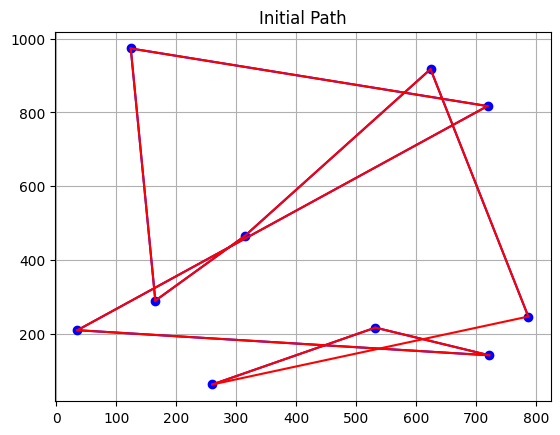

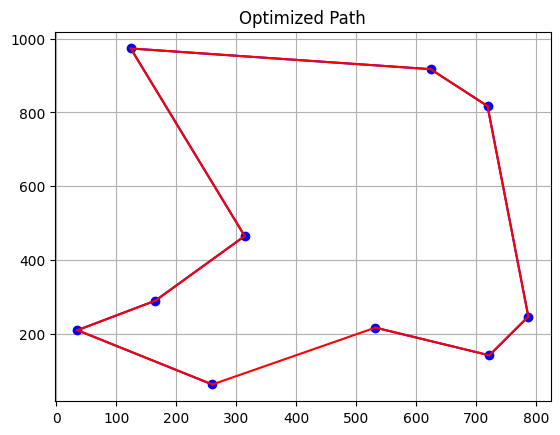

In [12]:
def randomCoord(min = 0, max = 1000):
  return int(random.random() * (max - min) + min)

def createRandomPath(n = 10):
  path = Path()
  for i in range(n):
    node = Node(randomCoord(), randomCoord())
    path.append(node)
  return path

n = 10
path = createRandomPath(n)

path.plot("Initial Path")
path.twoOpt()
path.plot("Optimized Path")